<a href="https://colab.research.google.com/github/RC-RX-DEV-AUX/DataScienceCourseFullLabs/blob/main/Secao_10_LabsAlgoritomosGeneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 145 Criando umafunçao fitness

In [3]:
import numpy as np

In [4]:
def equation_func(solution):
  x = solution[0]
  equation_output = 2 * x + 5
  target_output = 20
  fitness = 1.0/np.abs(equation_output - target_output)
  return fitness

In [5]:
lista = [-10, -5, 0, 5, 7.5, 10]
for value in lista:
  result = equation_func([value])
  print(result)

0.02857142857142857
0.04
0.06666666666666667
0.2
inf
0.2


<ipython-input-4-4d40b1db48d9>:5: RuntimeWarning: divide by zero encountered in scalar divide
  fitness = 1.0/np.abs(equation_output - target_output)


#Valor Real [aula 146]

In [6]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00


In [8]:
import pygad
import numpy as np

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


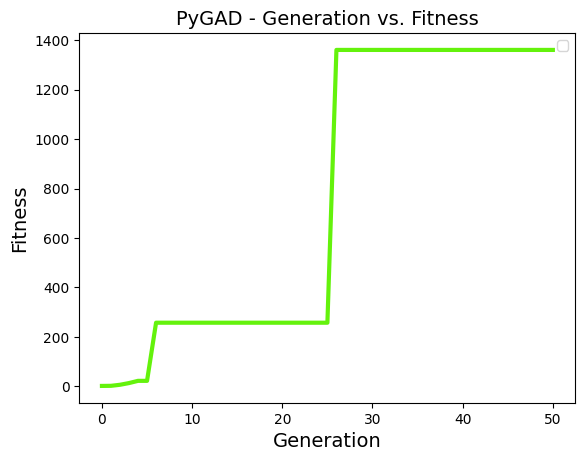

Melhor Soluçao:  7.5
Pontos:  1360.7736784634915


In [12]:
def equation_func(ga_instance, solution, solution_idx):
  x= solution[0]
  equation_output = 2 * x + 5
  target_output = 20
  fitness = 1.0 / np.abs(equation_output - target_output + 1e-8)
  return fitness

ga_instance = pygad.GA(
    num_generations = 50, ##geraçoes == epochs emalgoritmos geneticos
    num_parents_mating = 10,
    fitness_func = equation_func,
    sol_per_pop = 20,
    num_genes = 1,
    gene_type = float,
    init_range_low = -10,
    init_range_high = 10
)

ga_instance.run()
ga_instance.plot_fitness()

solution, solution_fitness, _ = ga_instance.best_solution()
print("Melhor Soluçao: ", round(solution[0],1))
print("Pontos: ", solution_fitness)

In [ ]:
'''
Gemni explanations:

[[[The error message AttributeError: 'GA' object has no attribute 'plot_result' indicates that the pygad.GA class does not have a method called plot_result.
This is likely due to an outdated or incorrect version of the pygad library being used.
The plot_result function was renamed to plot_fitness in newer versions.]]]

Suggested Changes

import pygad
import numpy as np

def equation_func(ga_instance, solution, solution_idx):
  x= solution[0]
  equation_output = 2 * x + 5
  target_output = 20
  fitness = 1.0 / np.abs(equation_output - target_output + 1e-8)
  return fitness

ga_instance = pygad.GA(
    num_generations = 50, ##geraçoes == epochs emalgoritmos geneticos
    num_parents_mating = 10,
    fitness_func = equation_func,
    sol_per_pop = 20,
    num_genes = 1,
    gene_type = float,
    init_range_low = -10,
    init_range_high = 10
)

ga_instance.run()
# The plot_result() method has been replaced with plot_fitness()
ga_instance.plot_fitness() # Changed this line

solution, solution_fitness, _ = ga_instance.best_solution()
print("Melhor Soluçao: ", round(solution[0],1))
print("Pontos: ", solution_fitness)


'''

<h2>Aula 148 -> exemplo/Lab final do uso de algoritmos geneticos</h2>

In [13]:
import pygad
import numpy as np

In [23]:
itens = [
    ("canivete", 10, 1),
    ("feijao", 20, 5),
    ("batatas", 15, 10),
    ("lanterna", 2, 1),
    ("saco de dormir", 30, 7),
    ("corda", 10, 5),
    ("bussula", 30, 1)
]
limite_peso = 15

def fitness_func(ga_instance, solution, solution_idx):
  pontos = 0
  peso = 0
  for i in range(len(solution)):
    if solution[i] == 1:
      pontos += itens[i][1]
      peso += itens[i][2]
    if peso > limite_peso:
      return -1
  return pontos

ga_instance = pygad.GA(
    num_generations = 100,
    num_parents_mating = 5,
    fitness_func = fitness_func,
    sol_per_pop = 10,
    num_genes = len(itens),
    gene_type = int,
    init_range_low = 0,
    init_range_high = 2
)

ga_instance.run()
solution, solution_fitness, _ = ga_instance.best_solution()
print("Melhor Soluçao: ", solution)
print("Potos: ", solution_fitness)
#1100101 --> 90
#1101101 --> 92

Melhor Soluçao:  [1 1 0 1 1 0 1]
Potos:  92
